## CNN logistic


Only photos with max 960 in axis X and Y

MSE 



In [1]:
# !pip install keras

In [21]:
from tensorflow.keras import Sequential, Input, layers
from keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

In [22]:
train_label_csv= '/Users/wm/code/mc-will/bacterial_motor/BYU_Locating-Bacterial_Flagellar_Motors_2025/data/train_labels.csv'
df_train_label_csv = pd.read_csv (train_label_csv).copy()

# Sorting only motors 1 or 0
df_train_label_csv= df_train_label_csv[df_train_label_csv['Number of motors']<=1]

df_train_label_csv.head(3)
# Describe the CSV
df_train_label_csv.describe()

,row_id,Motor axis 0,Motor axis 1,Motor axis 2,Array shape (axis 0),Array shape (axis 1),Array shape (axis 2),Voxel spacing,Number of motors
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,370.559265,71.956594,258.968280,247.873122,412.510851,955.130217,955.181970,14.919699,0.522538
std,213.831043,79.521214,284.648696,276.867706,188.618812,70.874328,107.751581,1.984829,0.499909
min,0.000000,-1.000000,-1.000000,-1.000000,300.000000,924.000000,924.000000,6.500000,0.000000
25%,191.500000,-1.000000,-1.000000,-1.000000,300.000000,928.000000,928.000000,13.100000,0.000000
50%,367.000000,43.000000,158.000000,140.000000,300.000000,960.000000,928.000000,15.600000,1.000000
75%,560.500000,143.000000,519.000000,491.500000,500.000000,960.000000,956.000000,16.100000,1.000000
max,736.000000,364.000000,904.000000,896.000000,800.000000,1912.000000,1847.000000,19.700000,1.000000


In [4]:
"""
Function look the foto 72 in each 'tomo'
* Img size is too heavy at 960*960 pixel, so se test on 256*256

"""
def load_from_each_tomo(parent_folder,
                        # img_size=(960, 960),
                        img_size=(256,256),
                        # img_size=(128, 128),
                        ):

    slices = []
    # select the column of 'tomo_id' with only 1/0 Motors
    tomo_ids = df_train_label_csv['tomo_id']
    # print (tomo_ids)

    # Loop to look each foto per Tomo_id
    for id in tomo_ids:
        # make the path btw parent_path and tomo_id
        tomo_path = os.path.join(parent_folder, id)
        # print(tomo_path)

        # Check if it is a real directory
        if os.path.isdir(tomo_path):
            # make a liste of all the photo per tomo
            all_slices = sorted([f for f in os.listdir(tomo_path)])
            # print(' all slices:',len(all_slices), type(all_slices), all_slices)

            number = 72 ### mean where the best photo is

            slice_path =os.path.join(tomo_path, all_slices[number])
            # load the img from slice_path with same size , in 1 chanel = W/B
            img = load_img(slice_path,
                           target_size=img_size,
                           color_mode='grayscale',
                           )
            # Normalization btw 0/1 divide by 255
            img_array = img_to_array(img) / 255

            # append to the slice list
            slices.append(img_array)

    # return un array to be used
    return np.array(slices)

path= '/Users/wm/code/mc-will/bacterial_motor/BYU_Locating-Bacterial_Flagellar_Motors_2025/data/pictures_raw/train'
X =load_from_each_tomo(path, )


0      tomo_003acc
1      tomo_00e047
8      tomo_01a877
9      tomo_02862f
10     tomo_0308c5
          ...     
732    tomo_fe050c
733    tomo_fe85f6
734    tomo_fea6e8
735    tomo_ff505c
736    tomo_ff7c20
Name: tomo_id, Length: 599, dtype: object


In [ ]:
def init_model_cnnlog(X):
    model = Sequential()
    model.add(Input(shape= X.shape[1:]))

    model.add(layers.Conv2D(32, (3, 3),
                            padding='same',
                            activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    #
    model.add(layers.Conv2D(64, (3, 3),
                            padding='same',
                            activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(256,activation= 'relu'))

    model.add(layers.Dense(1, activation='sigmoid'))
    return model
model = init_model_cnnlog(X)

In [ ]:
def init_model_cnnlog(X):
    model = Sequential()
    model.add(Input(shape= X.shape[1:]))

    model.add(layers.Conv2D(32, (3, 3),
                            padding='same',
                            activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    #
    model.add(layers.Conv2D(64, (3, 3),
                            padding='same',
                            activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(256,activation= 'relu'))

    model.add(layers.Dense(1, activation='sigmoid'))
    return model
model = init_model_cnnlog(X)

In [ ]:
def init_model_cnnlog(X):
    model = Sequential()
    model.add(Input(shape= X.shape[1:]))

    model.add(layers.Conv2D(32, (3, 3),
                            padding='same',
                            activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    #
    model.add(layers.Conv2D(64, (3, 3),
                            padding='same',
                            activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(256,activation= 'relu'))

    model.add(layers.Dense(1, activation='sigmoid'))
    return model
model = init_model_cnnlog(X)

In [ ]:
def init_model_cnnlog(X):
    model = Sequential()
    model.add(Input(shape= X.shape[1:]))

    model.add(layers.Conv2D(32, (3, 3),
                            padding='same',
                            activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    #
    model.add(layers.Conv2D(64, (3, 3),
                            padding='same',
                            activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(256,activation= 'relu'))

    model.add(layers.Dense(1, activation='sigmoid'))
    return model
model = init_model_cnnlog(X)

In [5]:
# selection of y= 1 or 0 Motors
y= df_train_label_csv['Number of motors']

In [6]:
def init_model_cnnlog(X):
    model = Sequential()
    model.add(Input(shape= X.shape[1:]))

    model.add(layers.Conv2D(32, (3, 3),
                            padding='same',
                            activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    #
    model.add(layers.Conv2D(64, (3, 3),
                            padding='same',
                            activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(256,activation= 'relu'))

    model.add(layers.Dense(1, activation='sigmoid'))
    return model
model = init_model_cnnlog(X)

In [9]:
def model_compiled(model):
    model.compile(loss= 'binary_crossentropy',
                  optimizer = 'adam',
                  metrics=['mse', 'F1Score'] )
    return model
model_compi = model_compiled(model)

In [ ]:

# validation_data = (X_val_trans,y_val)


def model_train (model, X_train_processed, y_train, batch_size=16 ,epochs=50):
    verbose=0
    validation_split=0.2
    es = EarlyStopping(patience=5,
                       restore_best_weights=True)

    history = model.fit(X_train_processed,
                        y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_split=validation_split,
                        callbacks=[es],
                        verbose=verbose)
    return history
history = model_train(model_compi, X,y)
history

In [11]:
history.history

{'F1Score': [0.6842836737632751,
  0.6894664168357849,
  0.6894664168357849,
  0.6913579702377319,
  0.696132481098175,
  0.6913579702377319,
  0.696132481098175,
  0.6951723694801331,
  0.6990290880203247,
  0.699999988079071,
  0.6990290880203247],
 'loss': [1.8266921043395996,
  0.6306701302528381,
  0.5454867482185364,
  0.43943482637405396,
  0.3367079794406891,
  0.20754411816596985,
  0.21199344098567963,
  0.191396564245224,
  0.06307656317949295,
  0.028969455510377884,
  0.014887923374772072],
 'mse': [0.29208219051361084,
  0.22139766812324524,
  0.18250395357608795,
  0.14452388882637024,
  0.10242535173892975,
  0.05752027779817581,
  0.059952422976493835,
  0.05589993670582771,
  0.012021944858133793,
  0.004224410280585289,
  0.0008454910712316632],
 'val_F1Score': [0.6740331053733826,
  0.6740331053733826,
  0.6740331053733826,
  0.6777777671813965,
  0.6740331053733826,
  0.6777777671813965,
  0.681564211845398,
  0.6777777671813965,
  0.681564211845398,
  0.6815642118

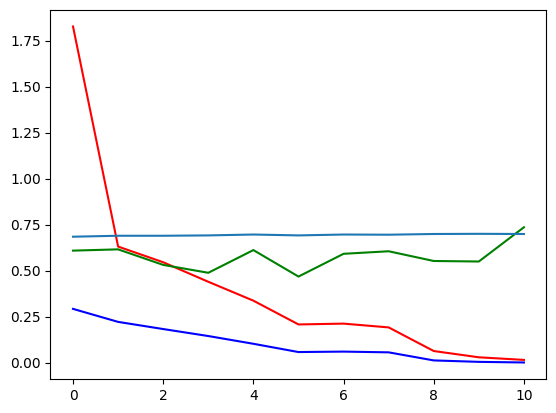

In [20]:
plt.plot(history.history['loss'], c='r');
plt.plot(history.history['mse'],c='b');
plt.plot(history.history['val_loss'],c='g');
plt.plot(history.history['F1Score']);


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    67,109,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,384,581 (768.22 MB)

 Trainable params: 67,128,193 (256.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 134,256,388 (512.15 MB)